In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_1_path = './data/amazon_cells_labelled.txt'
dataset_2_path = './data/imdb_labelled.txt'
dataset_3_path = './data/yelp_labelled.txt'

## About the data

- Format: `sentence \t score \n`
- Key: Score is either 1 (for positive) or 0 (for negative)

## Assignment

- Perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative
- Pick one of the company data files and build your own classifier. 
- When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [60]:
data_raw = pd.read_csv(dataset_1_path, delimiter="\t", header=None)
data_raw.columns = ['text', 'sentiment']
data_raw.head(3)

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [61]:
keywords = ["great", "good"]

for key in keywords:
    data_raw[key] = (data_raw.text.str.contains(key, case=False)).astype(int)

data_raw.head(3)

,text,sentiment,great,good
0,So there is no way for me to plug it in here i...,0,0,0
1,"Good case, Excellent value.",1,0,1
2,Great for the jawbone.,1,1,0


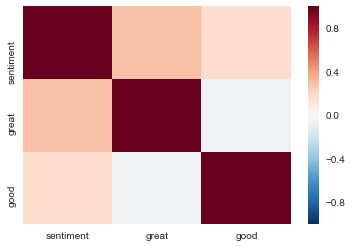

In [62]:
sns.heatmap(data_raw.corr())